## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


['.ipynb_checkpoints', 'heart.csv', 'Model implementation.ipynb']


## Import data

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(303, 14)

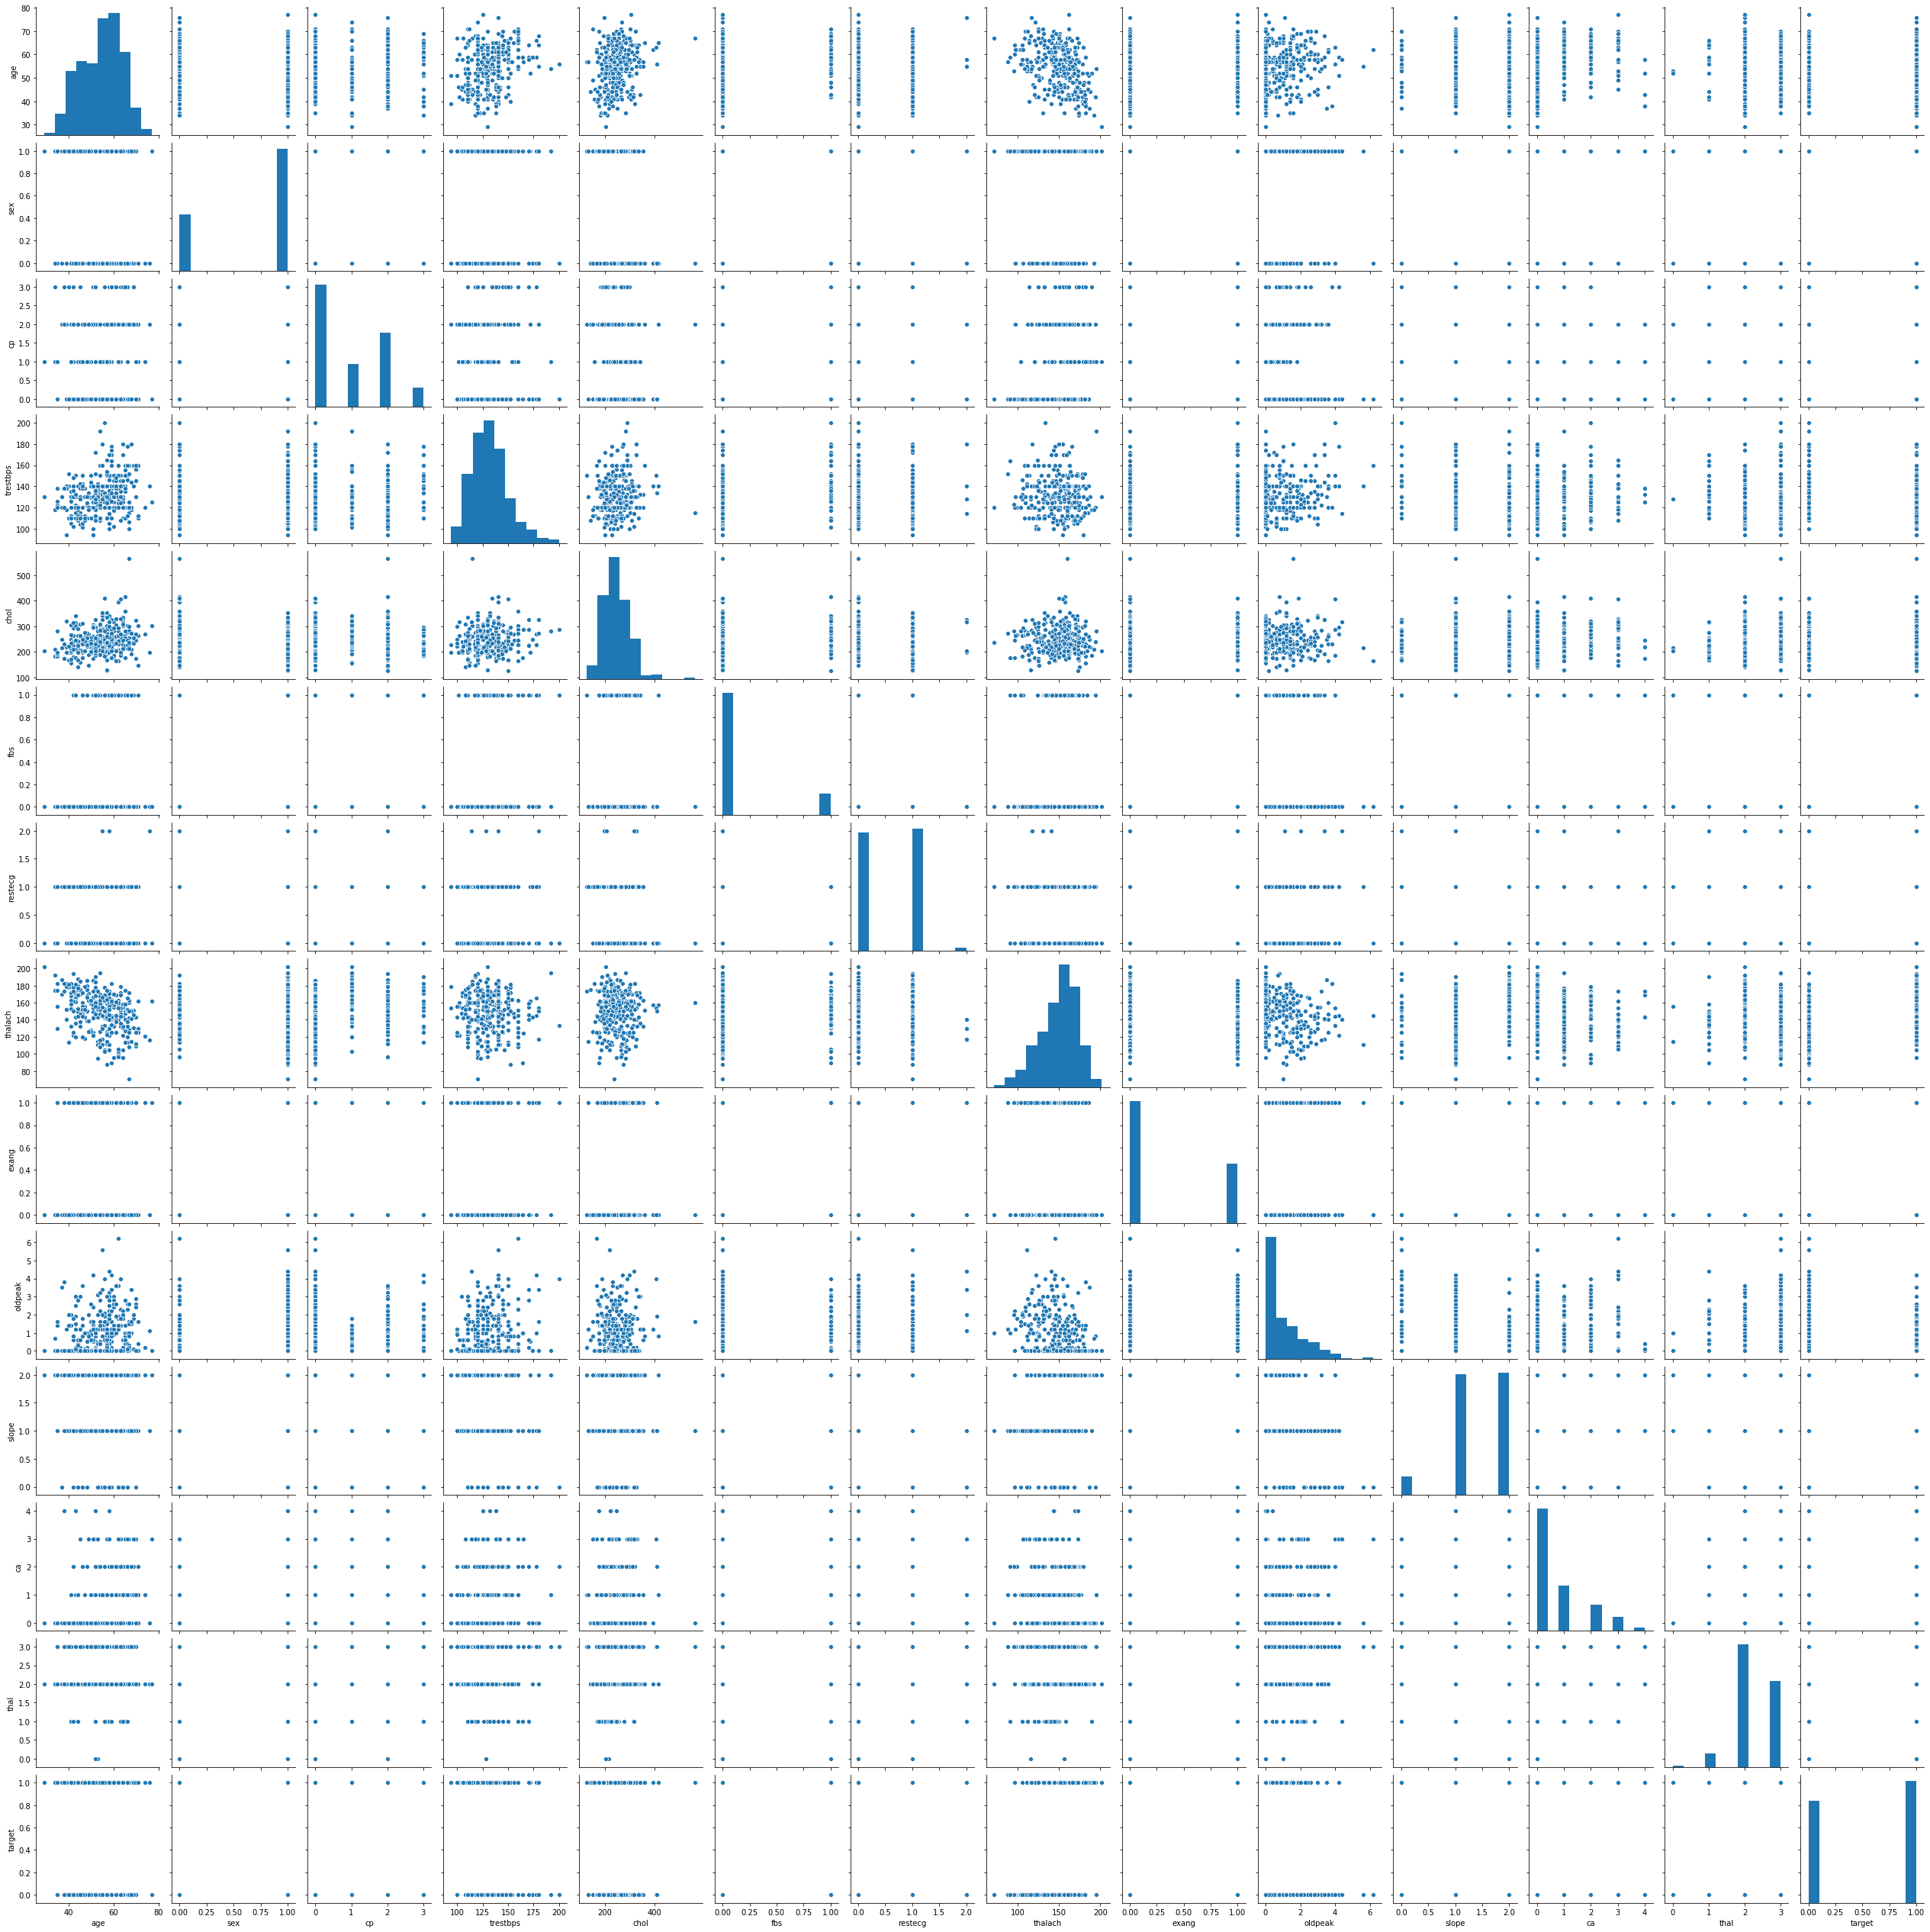

In [5]:
sns.pairplot(data = data)

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data.isnull().sum().sum()

0

In [12]:
X = data.drop("target",axis=1)
y = data["target"]

In [13]:
X.shape

(303, 13)

In [14]:
y.shape

(303,)

## Exploratory data analysis

1    165
0    138
Name: target, dtype: int64


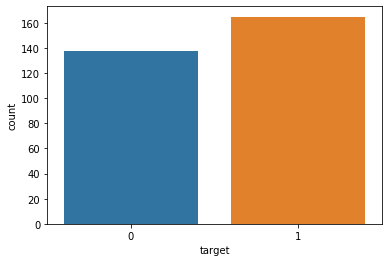

In [15]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [17]:
data["sex"].unique()

array([1, 0], dtype=int64)

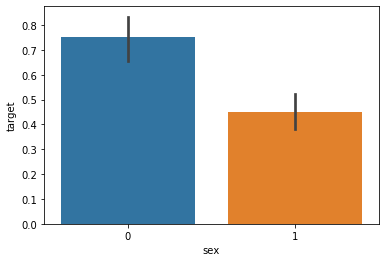

In [18]:
sns.barplot(data["sex"],data["target"])

In [19]:
def plotAge():
    facet_grid = sns.FacetGrid(data, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='age', ylabel='density')
    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()

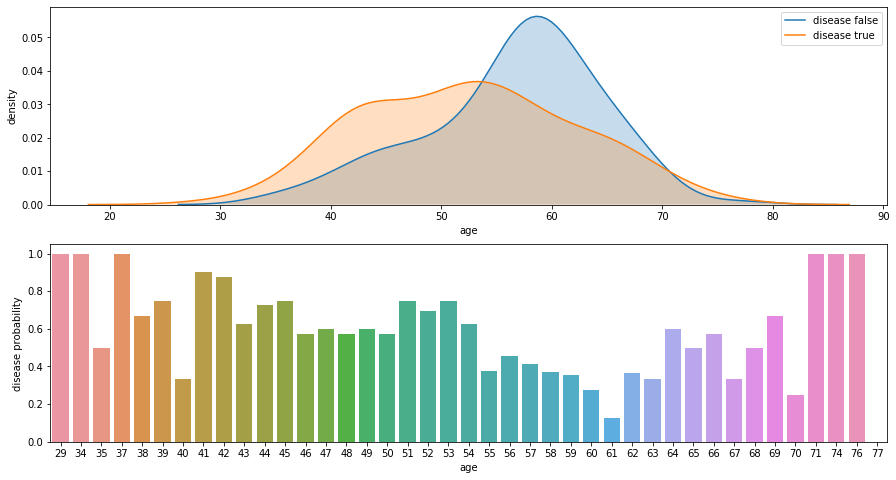

<Figure size 216x216 with 0 Axes>

In [20]:
fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

plotAge()

In [21]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [22]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [23]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [24]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

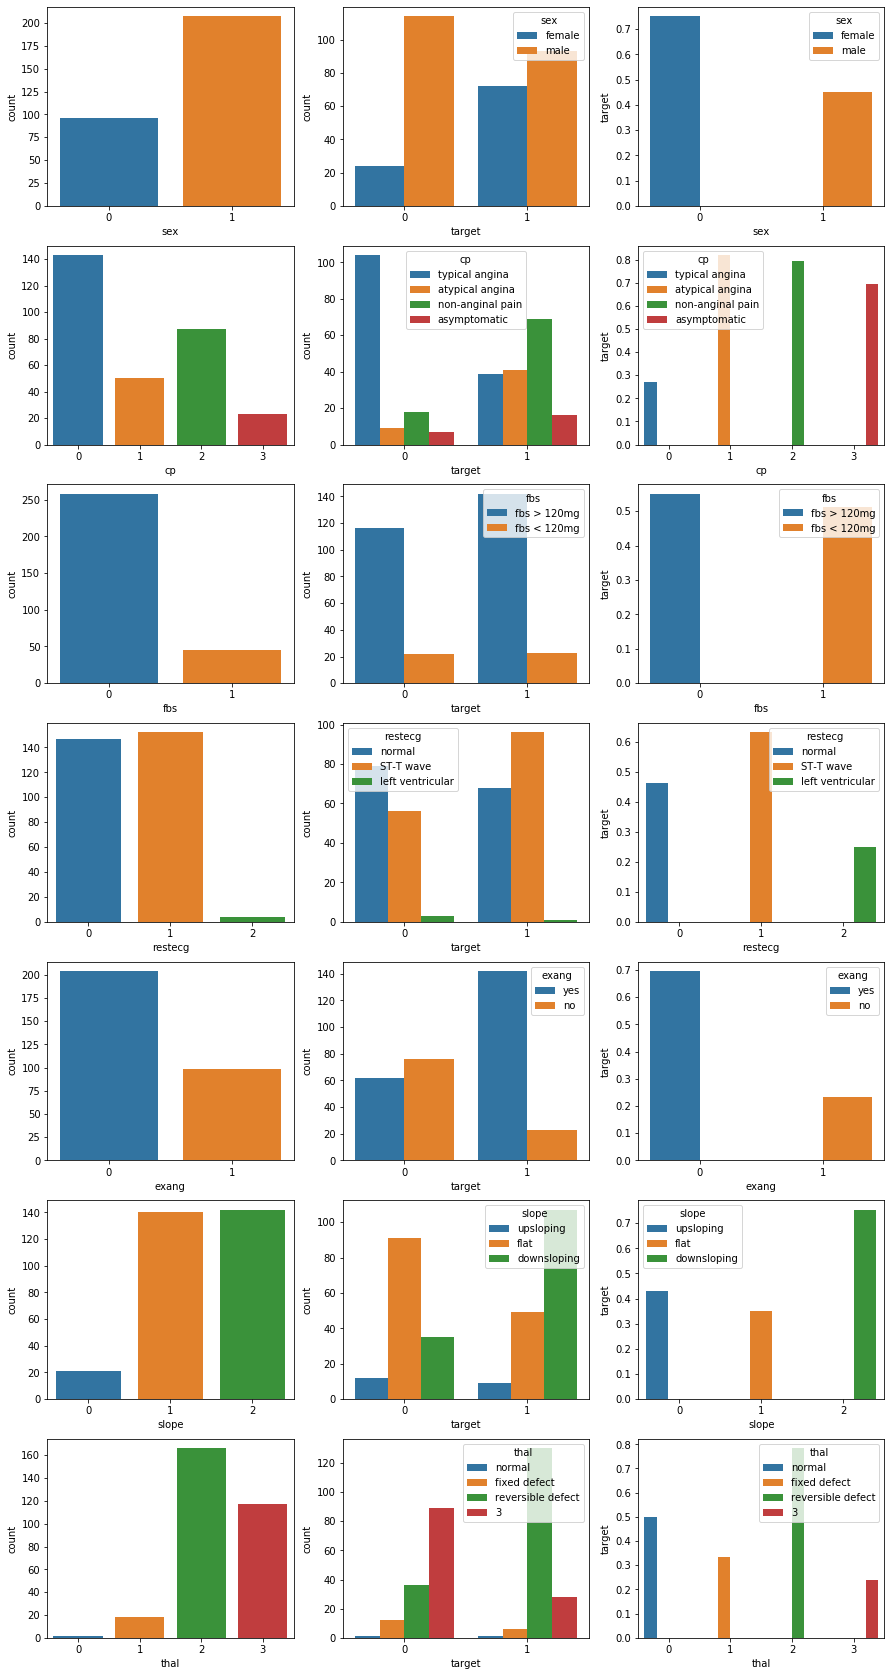

In [25]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [26]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [27]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

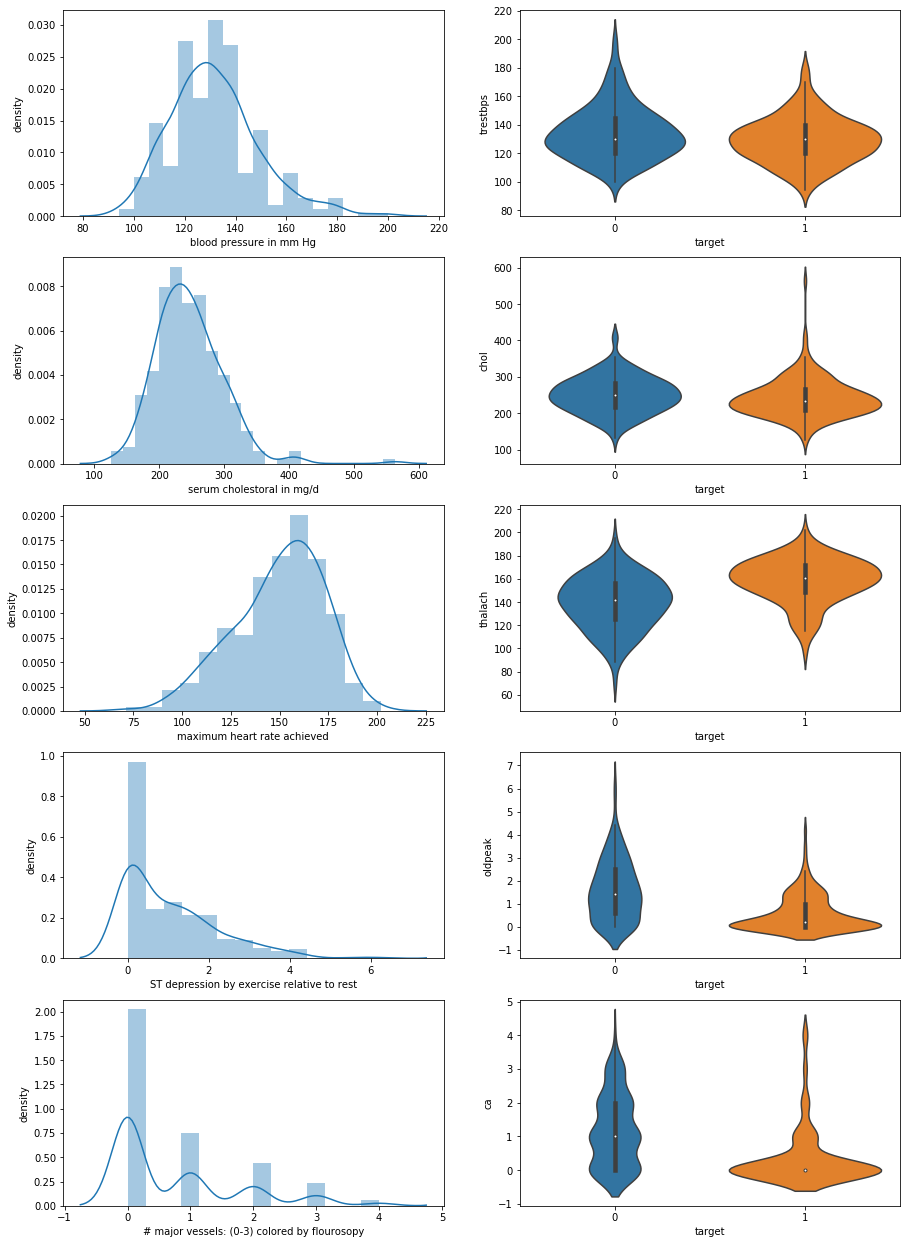

In [28]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

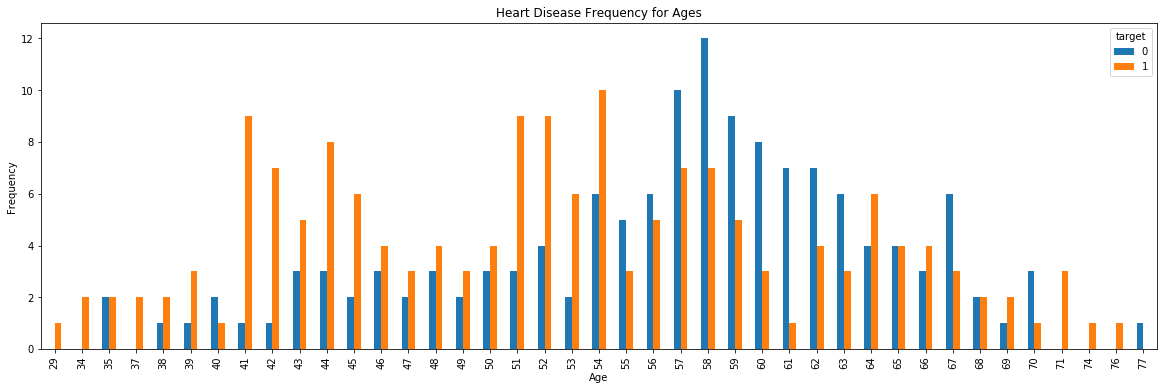

In [29]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

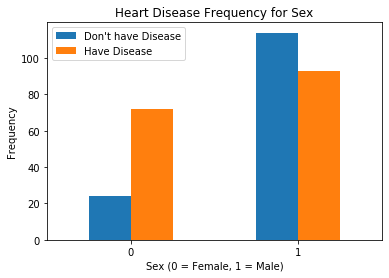

In [30]:
pd.crosstab(data.sex,data.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [31]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
     'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [32]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


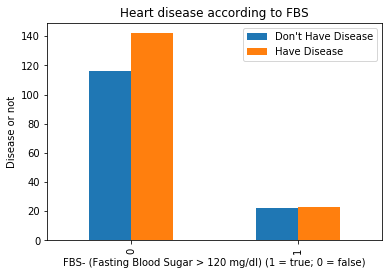

In [33]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar")
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [34]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

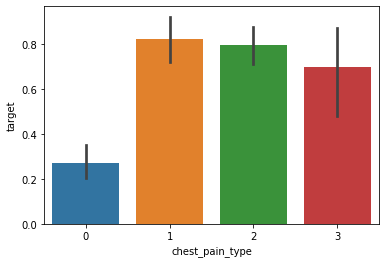

In [35]:
sns.barplot(data["chest_pain_type"],y)

In [36]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

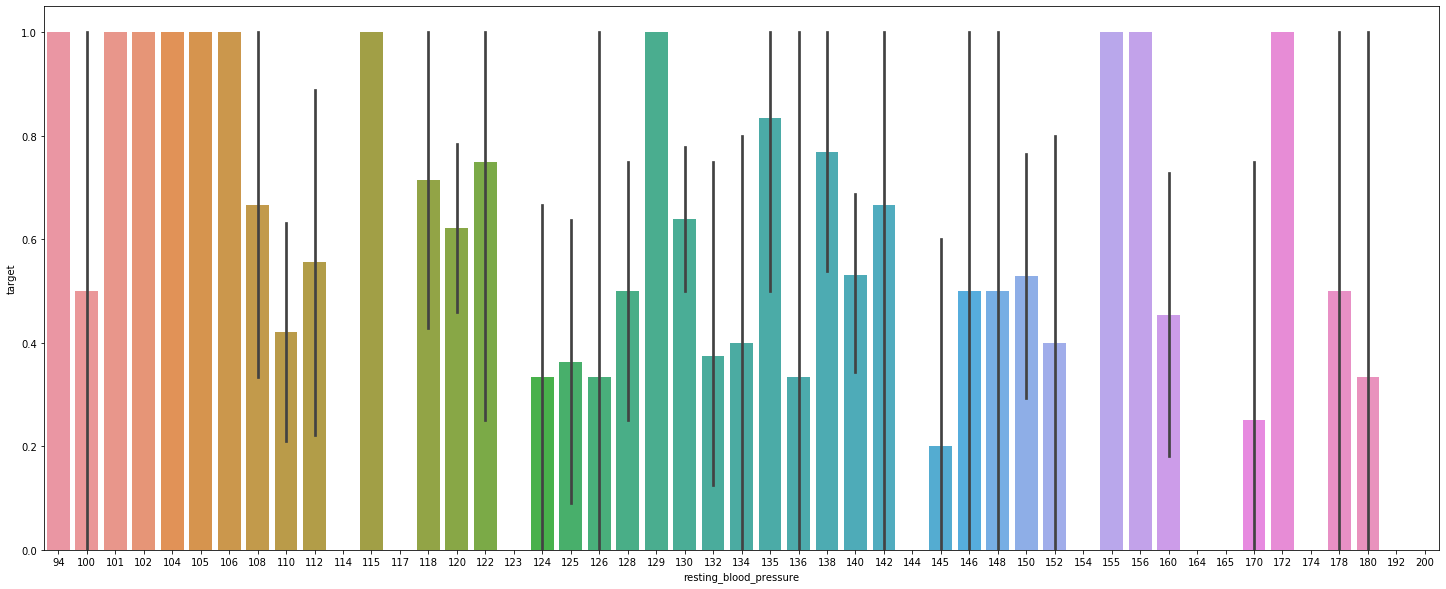

In [37]:
plt.figure(figsize=(25, 10))
sns.barplot(data["resting_blood_pressure"],y)

In [38]:
data["rest_ecg"].unique()

array([0, 1, 2], dtype=int64)

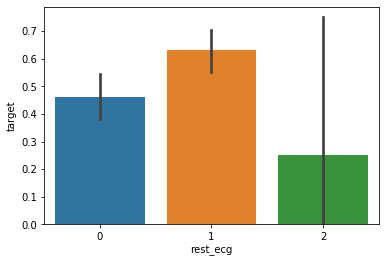

In [39]:
sns.barplot(data["rest_ecg"],y)

In [40]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

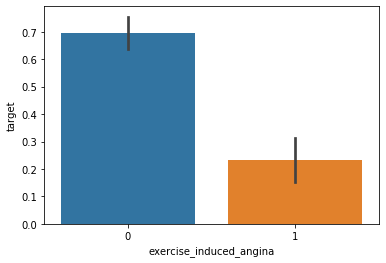

In [41]:
sns.barplot(data["exercise_induced_angina"],y)

In [42]:
data["st_slope"].unique()

array([0, 2, 1], dtype=int64)

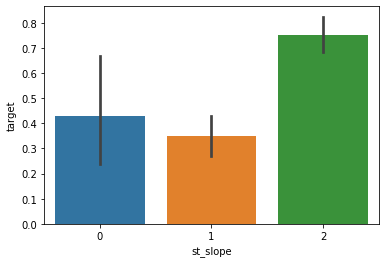

In [43]:
sns.barplot(data["st_slope"],y)

In [44]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

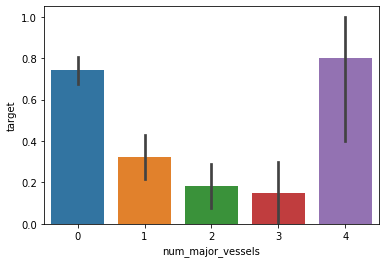

In [45]:
sns.barplot(data["num_major_vessels"],y)

In [46]:
data["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

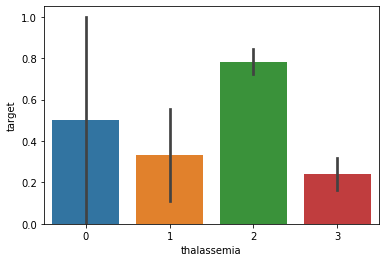

In [47]:
sns.barplot(data["thalassemia"],y)

In [48]:
cont_names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

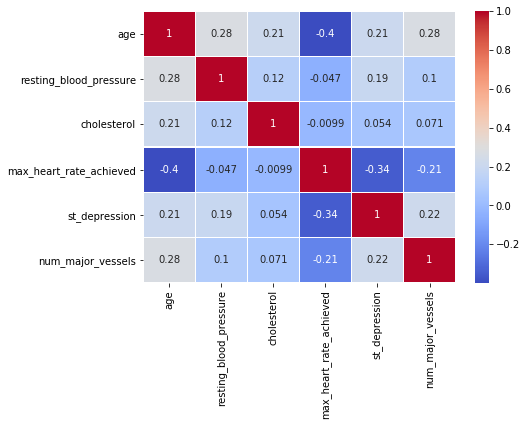

In [49]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cont_names]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

## Normalising data

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
print(scaler.data_min_)
print(scaler.data_max_)
X_norm = scaler.transform(X)


[ 29.   0.   0.  94. 126.   0.   0.  71.   0.   0.   0.   0.   0.]
[ 77.    1.    3.  200.  564.    1.    2.  202.    1.    6.2   2.    4.
   3. ]


In [51]:
type(X_norm)

numpy.ndarray

In [52]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
data_norm = pd.DataFrame(data = X_norm, columns = columns)

In [53]:
type(data_norm)

pandas.core.frame.DataFrame

In [54]:
data_norm.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [55]:
y.shape

(303,)

## Fuzzy clustering algorithm

In [56]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\tneha\anaconda3\lib\site-packages (0.4.2)
Note: you may need to restart the kernel to use updated packages.


In [57]:
import skfuzzy as fuzz
from sklearn import metrics
fpcs =[]
index = []
nclusters = range(2,10)
m = [1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5]
for cluster in nclusters:
    for coeff in m:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_norm.transpose(), cluster, coeff, error=0.001, maxiter=1000, init=None)
        fpcs.append([fpc,coeff,cluster])
        cluster_membership = np.argmax(u, axis=0)
        Silhouette = metrics.silhouette_score(data_norm, cluster_membership.transpose())
        index.append([Silhouette,coeff,cluster])
    
print("The value of m and the number of clusters for maximum fuzzy coefficient is ")
ans1 = max(fpcs,key = lambda x:x[0])
print(ans1)
print("The value of m and the number of clusters for maximum silhouette score is ")
ans2 = max(index,key = lambda x:x[0])
print(ans2)


The value of m and the number of clusters for maximum fuzzy coefficient is 
[0.7059740908517993, 1.5, 2]
The value of m and the number of clusters for maximum silhouette score is 
[0.25941661004572336, 1.5, 3]


In [58]:
 cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_norm.transpose(), ans1[2], ans1[1], error=0.001, maxiter=1000, init=None)

## Adding ouptut of fuzzy clustering to the normalised data

In [59]:
new_data = np.column_stack((data_norm, u.transpose()))
print(new_data)
type(new_data)
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal","c1","c2"]
updated_data = pd.DataFrame(data = new_data, columns = columns)

[[0.70833333 1.         1.         ... 0.33333333 0.39248713 0.60751287]
 [0.16666667 1.         0.66666667 ... 0.66666667 0.3295377  0.6704623 ]
 [0.25       0.         0.33333333 ... 0.66666667 0.11431126 0.88568874]
 ...
 [0.8125     1.         0.         ... 1.         0.51759269 0.48240731]
 [0.58333333 1.         0.         ... 1.         0.95557966 0.04442034]
 [0.58333333 0.         0.33333333 ... 0.66666667 0.13814249 0.86185751]]


In [60]:
type(updated_data)

pandas.core.frame.DataFrame

In [61]:
updated_data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,c1,c2
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,0.392487,0.607513
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,0.329538,0.670462
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,0.114311,0.885689
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,0.080708,0.919292
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,0.655397,0.344603


## split data into test data and train data

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(updated_data,y,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [63]:
X_train.shape

(242, 15)

In [64]:
X_test.shape

(61, 15)

In [65]:
Y_train.shape

(242,)

In [66]:
Y_test.shape

(61,)

## Support vector machine

In [67]:
# SVM
from sklearn import svm
clf = svm.SVC(C = 1000, gamma = 0.01 )
clf.fit(X_train,Y_train)
clf.support_vectors_
y_predict_test = clf.predict(X_test)
y_predict_train = clf.predict(X_train)
clf.score(X_test,Y_test)


0.9016393442622951

In [68]:
clf.support_vectors_

array([[0.70833333, 0.        , 0.        , ..., 0.66666667, 0.74003136,
        0.25996864],
       [0.58333333, 1.        , 0.33333333, ..., 0.66666667, 0.11988325,
        0.88011675],
       [0.625     , 1.        , 1.        , ..., 0.66666667, 0.15336914,
        0.84663086],
       ...,
       [0.875     , 0.        , 0.33333333, ..., 0.66666667, 0.17436907,
        0.82563093],
       [0.52083333, 1.        , 0.66666667, ..., 1.        , 0.16359414,
        0.83640586],
       [0.5625    , 1.        , 1.        , ..., 1.        , 0.20581506,
        0.79418494]])

In [69]:
len(clf.support_)

102

In [70]:
clf.n_support_

array([49, 53])

In [71]:
clf.decision_function(X_test)

array([-3.09884351,  0.75855569,  0.84197441, -2.35765605, -1.61360598,
        0.17797978, -1.27757064, -1.15016119, -4.74335331, -4.12303529,
        1.27384285,  2.62468815, -1.81528049,  1.10527856,  2.34663003,
        0.62360125, -1.09726608,  1.13290558, -3.86267887,  1.53871632,
        1.50209851, -0.12925302, -1.62619998, -0.89548444,  1.43324674,
       -0.19014345, -0.75485781, -0.1037095 ,  2.90983142,  0.19074026,
        0.27376045, -2.79915595,  3.07671121,  1.28511931,  2.06721198,
       -0.12508653, -2.81490884,  1.10250442, -1.78476476, -0.59131032,
        0.99839121,  1.37079329,  0.02375133, -1.19972726,  0.42918192,
        0.27788787,  1.04353681, -0.11811224, -2.36477403,  1.06583504,
        1.16661846,  0.43827247,  3.11143671,  1.24631113,  4.55245391,
       -1.48139555,  2.1423227 ,  1.83324621,  1.10323801,  2.66966974,
        1.1403596 ])

## Accuracy score

In [72]:
from sklearn.metrics import accuracy_score
score_linear_svc_train = round(accuracy_score(y_predict_train,Y_train)*100,2)
print("The accuracy score on training data is: "+str(score_linear_svc_train)+" %")
score_linear_svc_test = round(accuracy_score(y_predict_test,Y_test)*100,2)
print("The accuracy score on test data is: "+str(score_linear_svc_test)+" %")

The accuracy score on training data is: 86.78 %
The accuracy score on test data is: 90.16 %


## Confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
matrix_train= confusion_matrix(Y_train, y_predict_train)
matrix_test= confusion_matrix(Y_test, y_predict_test)

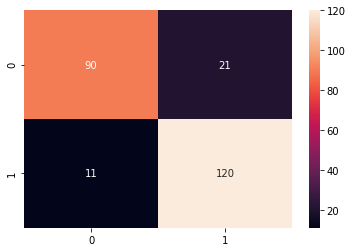

In [75]:
sns.heatmap(matrix_train,annot = True, fmt = "d")

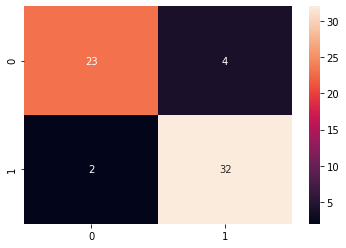

In [76]:
sns.heatmap(matrix_test,annot = True, fmt = "d")

## Precision 

In [77]:
from sklearn.metrics import precision_score

In [78]:
precision_train = precision_score(Y_train, y_predict_train)
precision_test = precision_score(Y_test, y_predict_test)

In [79]:
print("Precision of linear svc on training data is ",precision_train)
print("Precision of linear svc on test data is ",precision_test)

Precision of linear svc on training data is  0.851063829787234
Precision of linear svc on test data is  0.8888888888888888


## Recall

In [80]:
from sklearn.metrics import recall_score

In [81]:
recall_train = recall_score(Y_train, y_predict_train)
recall_test = recall_score(Y_test, y_predict_test)

In [82]:
print("Recall of linear svc on training data is ",recall_train)
print("Recall of linear svc on test data is ",recall_test)

Recall of linear svc on training data is  0.916030534351145
Recall of linear svc on test data is  0.9411764705882353


## Learning curve

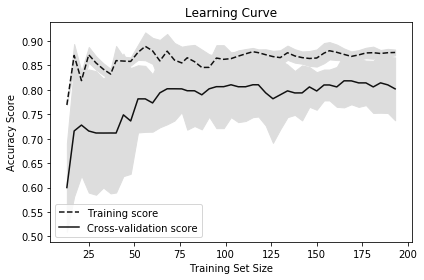

In [83]:
from sklearn.model_selection import learning_curve
from sklearn import svm
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(), 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Support vector machine with non linear kernel

In [84]:
gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
kernel = {'linear','rbf','poly','sigmoid'}
scores_nusvc = []
for kernel in kernel: 
    for gamma in gamma_range:
            nclf = svm.NuSVC(gamma = gamma, kernel = kernel)
            nclf.fit(X_train,Y_train)
            y_predict_nusvc = nclf.predict(X_test)
            score_nusvc = clf.score(X_test,Y_test)
            scores_nusvc.append((score_nusvc,kernel,gamma))

ans = print(max(scores_nusvc, key = lambda x:x[0]))


(0.9016393442622951, 'poly', 0.0001)


In [85]:
nclf = svm.NuSVC(gamma = 0.0001, kernel = 'rbf')
nclf.fit(X_train,Y_train)
y_predict_nsvc_train = nclf.predict(X_train)
y_predict_nsvc_test = nclf.predict(X_test) 
score_rbf = clf.score(X_test,Y_test)

In [86]:
print("Results for non linear SVC with rbf kernel are as follows:")
score_nonlinear_svc_train = round(accuracy_score(y_predict_nsvc_train,Y_train)*100,2)
print("The accuracy score on training data is: "+str(score_nonlinear_svc_train)+" %")
score_nonlinear_svc_test = round(accuracy_score(y_predict_nsvc_test,Y_test)*100,2)
print("The accuracy score on test data is: "+str(score_nonlinear_svc_test)+" %")

Results for non linear SVC with rbf kernel are as follows:
The accuracy score on training data is: 80.99 %
The accuracy score on test data is: 80.33 %


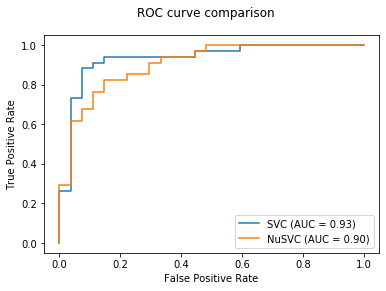

In [87]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf, X_test, Y_test)
rfc_disp = plot_roc_curve(nclf, X_test, Y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()

In [88]:
nclf = svm.NuSVC(gamma = 0.0001, kernel = 'poly')
nclf.fit(X_train,Y_train)
y_predict_nsvc_train = nclf.predict(X_train)
y_predict_nsvc_test = nclf.predict(X_test)
score_poly = clf.score(X_test,Y_test)
print(score_poly)

0.9016393442622951


In [89]:
print("Results for non linear SVC with polynomial kernel are as follows:")
score_nonlinear_svc_train = round(accuracy_score(y_predict_nsvc_train,Y_train)*100,2)
print("The accuracy score on training data is: "+str(score_nonlinear_svc_train)+" %")
score_nonlinear_svc_test = round(accuracy_score(y_predict_nsvc_test,Y_test)*100,2)
print("The accuracy score on test data is: "+str(score_nonlinear_svc_test)+" %")

Results for non linear SVC with polynomial kernel are as follows:
The accuracy score on training data is: 72.73 %
The accuracy score on test data is: 73.77 %


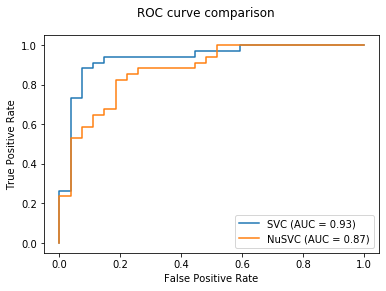

In [90]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf, X_test, Y_test)
rfc_disp = plot_roc_curve(nclf, X_test, Y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()

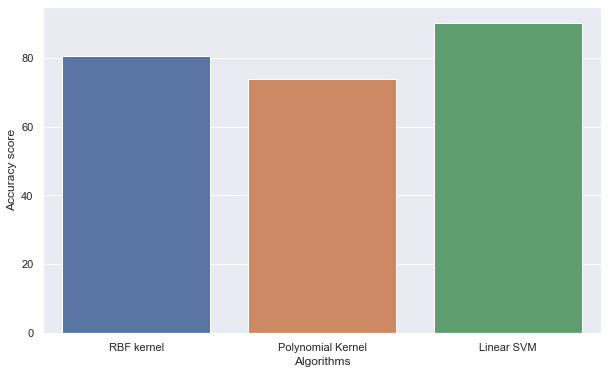

In [91]:
scores = [80.33,73.77,90.16]
algorithms = ["RBF kernel","Polynomial Kernel","Linear SVM"] 
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01,0.1,1,10],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, Y_train)
    

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.764 (+/-0.103) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.806 (+/-0.115) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.803 (+/-0.092) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.728 (+/-0.069) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.810 (+/-0.096) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.811 (+/-0.069) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.790 (+/-0.111) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.736 (+/-0.086) for {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.828 (+/-0.100) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.813 (+/-0.046) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.127) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.736 (+/-0.086) for {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
0.791 (+/-0.098) for {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.810 (+/-0.079) for {'C': 1000, 'gamma': 0.1,

In [93]:
from sklearn.cluster import KMeans
from sklearn import metrics
K_scores=[]
K_clusters = [2,3,4,5,6,7,8]
for K in K_clusters:
    kmeans = KMeans(n_clusters=K, random_state=None).fit(data_norm)
    labels = kmeans.labels_
    CHS = metrics.calinski_harabasz_score(data_norm, labels)
    Silhouette = metrics.silhouette_score(data_norm, labels, metric='euclidean')
    DBS = metrics.davies_bouldin_score(data_norm, labels)
    K_scores.append((K,CHS,Silhouette,DBS))
    
print(max(K_scores, key = lambda x:x[1]))
ans = print(max(K_scores, key = lambda x:x[2]))
print(max(K_scores, key = lambda x:x[3]))

(2, 93.82152315170765, 0.25177965944683706, 1.6164411255675286)
(5, 74.43474913642468, 0.28911263896610845, 1.3940339131080914)
(2, 93.82152315170765, 0.25177965944683706, 1.6164411255675286)


In [94]:
# DbSCaN algo
from sklearn.neighbors import NearestNeighbors
ns = 5
nbrs = NearestNeighbors(n_neighbors=ns).fit(data_norm)
distances, indices = nbrs.kneighbors(data_norm)
distanceDec = sorted(distances[:,ns-1], reverse=False)
print(indices)
len(indices)

[[  0  29 222  76 106]
 [  1 196 171 116 160]
 [  2  50 140  49 109]
 ...
 [300 197 231  97 282]
 [301 139 224 243 198]
 [302  75  67   6 128]]


303

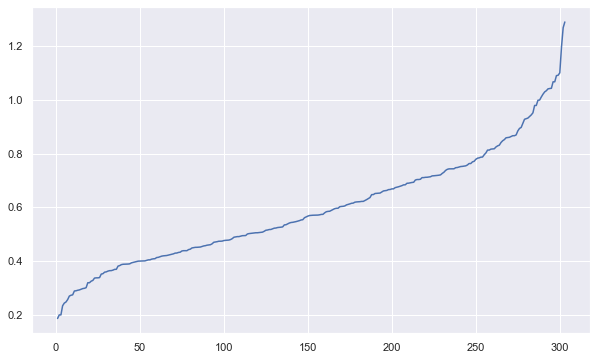

In [95]:
plt.plot(list(range(1,303+1)), distanceDec)

In [96]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=5).fit(data_norm)
params = DBSCAN(eps=1, min_samples=5).get_params()
labels = clustering.labels_
print(params)
Silhouette = metrics.silhouette_score(data_norm, labels, metric = 'euclidean')
print(Silhouette)

{'algorithm': 'auto', 'eps': 1, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 5, 'n_jobs': None, 'p': None}
0.3016775258825932


In [97]:
#optics
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=5, max_eps=np.inf, metric='euclidean', p=2, metric_params=None, cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', leaf_size=30, n_jobs=None).fit(data_norm)
clustering.labels_

array([ 0, -1, 10,  1, 15, -1, 11, -1,  0, -1, -1, -1,  1, -1, 16,  9, -1,
       -1, -1, -1, -1, -1, -1, 17, -1, -1,  0,  2, 16,  0,  7, -1,  3, -1,
       -1, 15, 16,  3,  8, 10, 10, -1, -1, 11,  3,  1,  3,  3, -1, -1, 10,
        4,  6,  9, 10, -1,  3,  3,  3, -1, 16, -1, -1, -1,  0, -1, -1, 11,
        1, -1,  5, -1,  3, -1,  9, 11,  0, -1,  0, -1,  2,  3, -1,  0, 11,
       -1, -1,  0,  9, 11,  0, 12, -1, -1,  9, -1, 11,  0, -1,  0, -1, -1,
       -1,  0,  2, -1,  0, 15,  7, -1, 15,  0,  8, -1,  1, -1, -1,  5,  7,
       15, -1,  3, 15, 10, -1,  7, -1,  8, 11, 15,  8,  9,  1,  1,  7, -1,
       16,  0, -1, 14, 10, -1,  9, -1, -1,  3,  9,  8,  2,  2, -1, -1,  5,
       11,  9,  9,  2,  1,  6,  3, -1, -1,  1, -1, -1, -1, 13, -1,  4, 17,
       17, -1, -1, -1, 13, -1, 17, -1, 13, -1, 14, -1, -1, -1,  4,  3, 12,
       13, -1,  3, 15, 13, -1, 13, -1, -1, -1,  0, 14, -1,  3, 13, -1, 17,
       -1, 12, 13, -1,  6, 12,  5, -1, -1, 15, 17, -1, -1, 17,  4, 17, -1,
       -1,  0, -1, -1, -1